# Overview
This is a deep learning image classification model, trained to classify malignant or benign skin cancer images.
Dataset: ISIC 2024 - Skin Cancer Detection with 3D-TBP

## References:
- International Skin Imaging Collaboration. SLICE-3D 2024 Permissive Challenge Dataset. International Skin Imaging Collaboration https://doi.org/10.34970/2024-slice-3d-permissive (2024)

# Setup & Dependencies
- Use GPU to prevent OOM errors

In [ ]:
# Data/malignant Data/benign
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os

In [ ]:
# Prevent OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load the dataset in batches
- Use the downloaded ISIC skin cancer 3D slice permissive dataset, located in data folder
- Read the images in batches

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#dataset pipelin, build image dataset, labels, classes, default preprocessing
data = tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/data')

Found 588 files belonging to 2 classes.


In [ ]:
#access the data pipeline throug an iterator
data_iterator = data.as_numpy_iterator()

In [ ]:
# return batches of 32 by default
batch = data_iterator.next()

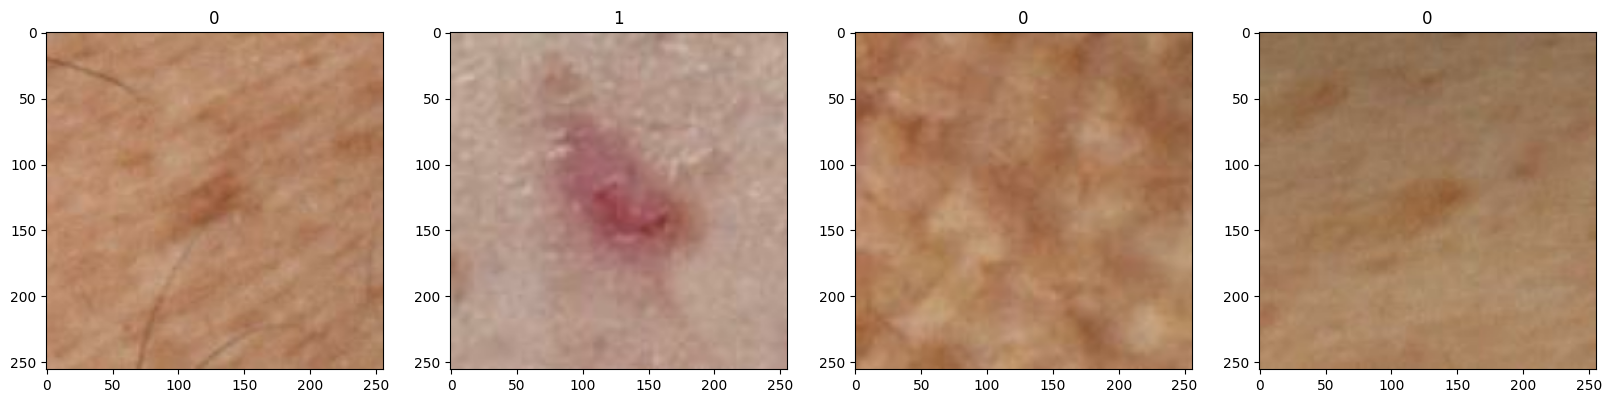

In [ ]:
# check image quality
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing
- Shape the data between 0-1
- Split the dataset into training, validation, and testing set

## Shape Data

In [ ]:
#Scale the x (images) to values between 0-1
#Apply transform as the data is read through the pipelin
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.7019608 , 0.4745098 , 0.3882353 ],
          [0.6983226 , 0.47087163, 0.38459712],
          [0.6893612 , 0.46191022, 0.3756357 ],
          ...,
          [0.7372549 , 0.5058824 , 0.44313726],
          [0.7372549 , 0.5058824 , 0.44313726],
          [0.7372549 , 0.5058824 , 0.44313726]],
 
         [[0.70123315, 0.47378218, 0.38750765],
          [0.69746   , 0.470009  , 0.3837345 ],
          [0.688166  , 0.46071503, 0.37444052],
          ...,
          [0.74307597, 0.51170343, 0.44895834],
          [0.74307597, 0.51170343, 0.44895834],
          [0.74307597, 0.51170343, 0.44895834]],
 
         [[0.6994409 , 0.4719899 , 0.38571537],
          [0.6953351 , 0.46788415, 0.38160962],
          [0.6852221 , 0.4577711 , 0.3714966 ],
          ...,
          [0.7574142 , 0.5260417 , 0.46329656],
          [0.7574142 , 0.5260417 , 0.46329656],
          [0.7574142 , 0.5260417 , 0.46329656]],
 
         ...,
 
         [[0.74257815, 0.52297026, 0.46414676],
          [0.74403

## Split the data

In [ ]:
# Split based on training 70%, validation 20%, test 10%
# ADJUST THE SET LATER
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
print(f"Train size: {len(train)}")
print(f"Validation size: {len(val)}")
print(f"Test size: {len(test)}")

Train size: 13
Validation size: 3
Test size: 1


# Build the Deep Learning Model
- Architecture - Conv2D-> MaxPooling2D -> Conv2D-> MaxPooling2D -> Conv2D-> MaxPooling2D -> Fully Connected

In [ ]:
# Check the dataset specs
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [ ]:
#create a logs directory to store training data
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.6105 - loss: 0.6328 - val_accuracy: 0.5625 - val_loss: 0.6418
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.7041 - loss: 0.5776 - val_accuracy: 0.7500 - val_loss: 0.5326
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.7269 - loss: 0.5416 - val_accuracy: 0.8125 - val_loss: 0.4580
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.7447 - loss: 0.4857 - val_accuracy: 0.8333 - val_loss: 0.4316
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.7876 - loss: 0.5125 - val_accuracy: 0.8125 - val_loss: 0.3955
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.7806 - loss: 0.5071 - val_accuracy: 0.7708 - val_loss: 0.5069
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.8028 - loss: 0.4501 - val_accuracy: 0.8125 - val_loss: 0.4391
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.8226 - loss: 0.4169 - val_accuracy: 0.

In [ ]:
hist.history

{'accuracy': [0.6466346383094788,
  0.7307692170143127,
  0.7403846383094788,
  0.754807710647583,
  0.776442289352417,
  0.776442289352417,
  0.8028846383094788,
  0.8149038553237915,
  0.7980769276618958,
  0.8293269276618958,
  0.8197115659713745,
  0.776442289352417,
  0.7980769276618958,
  0.8221153616905212,
  0.807692289352417,
  0.8413461446762085,
  0.8413461446762085,
  0.8293269276618958,
  0.8461538553237915,
  0.8533653616905212],
 'loss': [0.6181568503379822,
  0.5637710690498352,
  0.5277628898620605,
  0.4798899292945862,
  0.48574715852737427,
  0.5163256525993347,
  0.4381202161312103,
  0.43247678875923157,
  0.46256211400032043,
  0.4234049916267395,
  0.43017375469207764,
  0.46815580129623413,
  0.45880943536758423,
  0.4257485270500183,
  0.4161348342895508,
  0.4067220687866211,
  0.4005863070487976,
  0.3895406723022461,
  0.37893402576446533,
  0.3952881991863251],
 'val_accuracy': [0.5625,
  0.75,
  0.8125,
  0.8333333134651184,
  0.8125,
  0.7708333134651184

# Plot the Performance
- plot the loss
- plot the accuracy

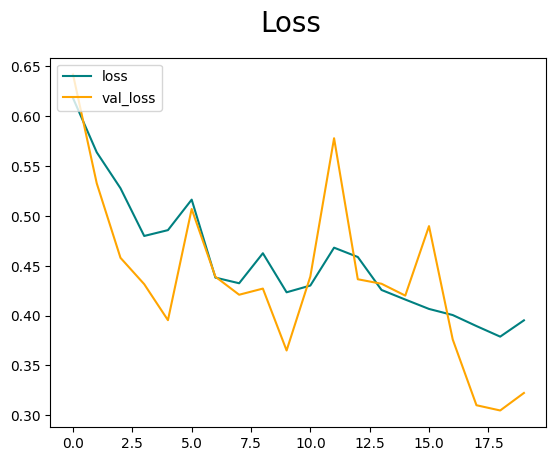

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

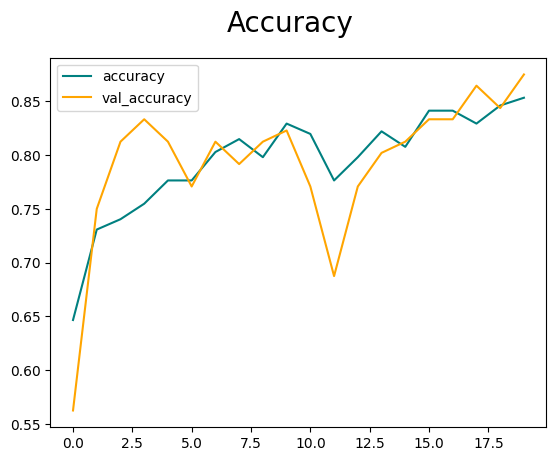

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate the performance
- Precision
- Recall
- Accuracy

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


In [ ]:
# Print the results in a formatted way
precision_value = pre.result().numpy()
recall_value = re.result().numpy()
accuracy_value = acc.result().numpy()

print(f"Precision: {precision_value:.4f}")
print(f"Recall: {recall_value:.4f}")
print(f"Accuracy: {accuracy_value:.4f}")

Precision: 1.0000
Recall: 0.8000
Accuracy: 0.8750


# Test the dataset on image outside dataset

In [ ]:
import cv2

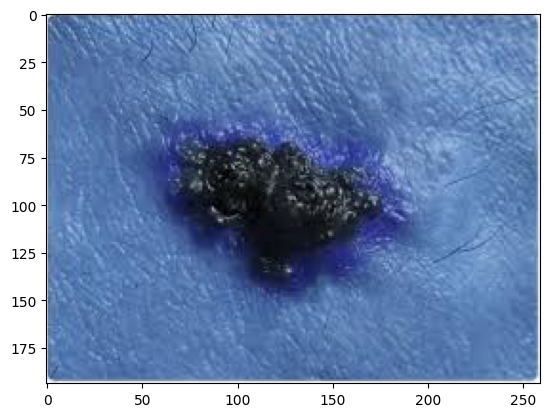

In [ ]:
img = cv2.imread('/content/drive/My Drive/mal.jpeg')
plt.imshow(img)
plt.show()

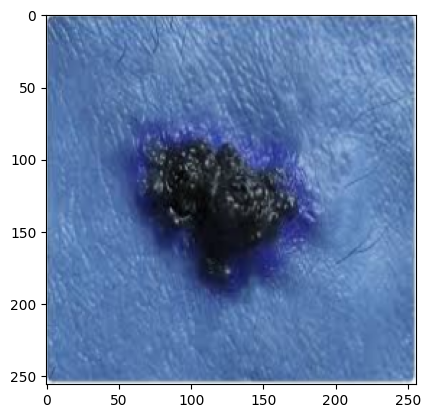

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


In [ ]:
yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is malignant')
else:
    print(f'Predicted class is benign')

Predicted class is malignant


# Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','cancerClassifier.h5'))

In [ ]:
new_model = load_model('cancerClassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))